<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Tree_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

This notebook looks at decision trees, how there visualizations are intuitive and easy to interpret, but also how this algorithm suffers from high variance (and how this expresses itself).

In [1]:
install.packages('ISLR')
install.packages('rpart')
install.packages('rpart.plot')

library(ISLR)
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We use a toy set from the ISLR-package, called Hitters, containing the salary for baseball players, along with additional characteristics of these players. To find out more about this dataset, add a code-section and run ?Hitters

In [2]:
data(Hitters)
df <- Hitters
str(df)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

We will develop a decision tree aiming to predict salary. In this dataset, Salary is expressed in terms of USD (x 1,000). We start with describing this outcome, to get a better sense of what we are working with.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   67.5   190.0   425.0   535.9   750.0  2460.0      59 

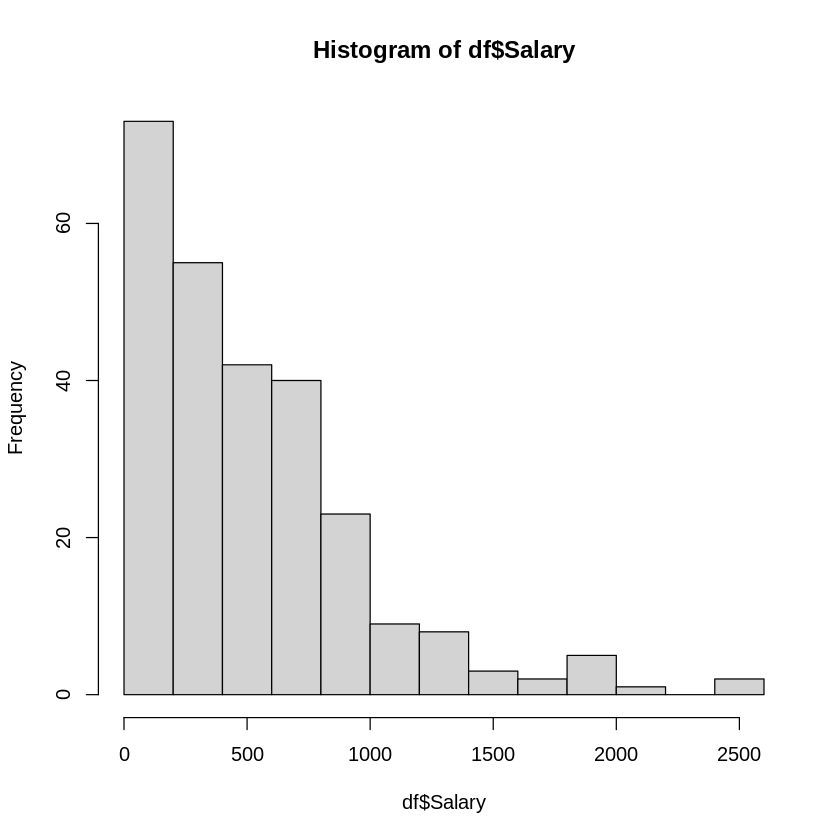

In [3]:
summary(df$Salary)
hist(df$Salary)

In line with how we generally approach model development, we take a random sample of data for training our model, and then use that to train (and plot) a decision tree.

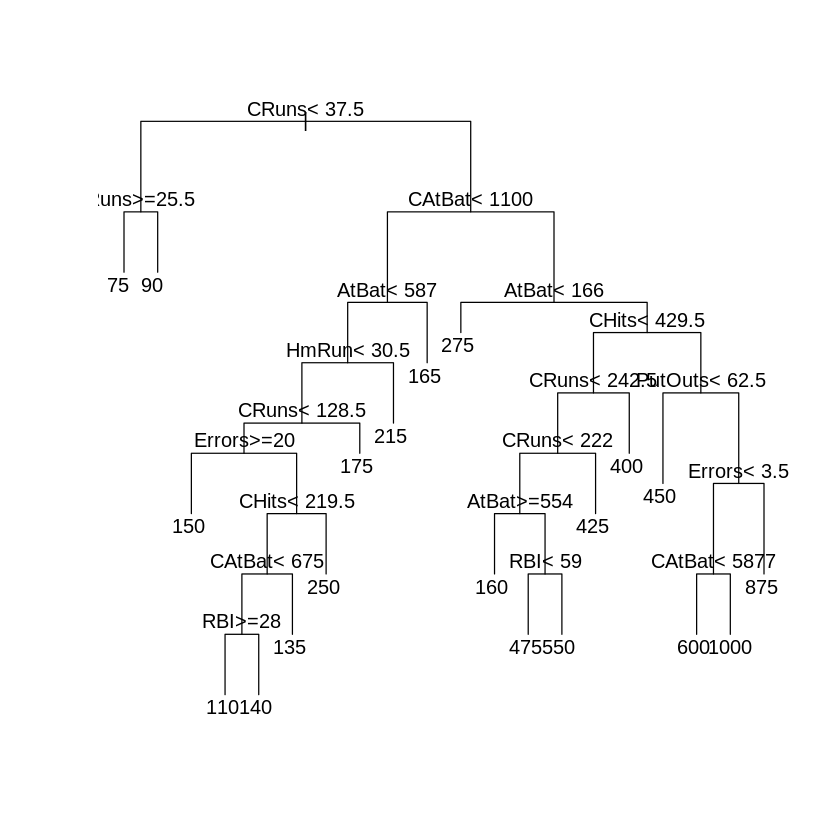

In [7]:
#take random subsample of data for training a decision tree
train <- sample(1:nrow(df),nrow(df)*0.6, replace = FALSE)
df_train <- df[train,]

# train and plot tree
tree.model <- rpart(Salary~., data = df_train, method = 'class', minsplit = 2)
plot(tree.model)
text(tree.model, pretty = 0)
